In [151]:
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import re          #import Regular expression expression
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt

train = pd.read_csv("C:\\Users\\DELL\\Downloads\\245_1.csv")

In [152]:
train.head()

,reviews.rating,reviews.text,reviews.title
0,5,i love this album. it's very good. more to the...,Just Awesome
1,5,Good flavor. This review was collected as part...,Good
2,5,Good flavor.,Good
3,1,I read through the reviews on here before look...,Disappointed
4,1,My husband bought this gel for us. The gel cau...,Irritation


In [153]:
train.columns

Index(['reviews.rating', 'reviews.text', 'reviews.title'], dtype='object')

In [154]:
train.shape

(71044, 3)

In [155]:
permanent = train[['reviews.rating' , 'reviews.text']]
mpermanent=permanent.dropna()
mpermanent.head()

,reviews.rating,reviews.text
0,5,i love this album. it's very good. more to the...
1,5,Good flavor. This review was collected as part...
2,5,Good flavor.
3,1,I read through the reviews on here before look...
4,1,My husband bought this gel for us. The gel cau...


In [156]:
mpermanent.shape

(71008, 2)

In [157]:
mpermanent["reviews.rating"] = mpermanent["reviews.rating"]>=4
mpermanent['reviews.rating'] = mpermanent['reviews.rating'].replace([True , False] , ['pos' , 'neg'])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [158]:
mpermanent.head()

,reviews.rating,reviews.text
0,pos,i love this album. it's very good. more to the...
1,pos,Good flavor. This review was collected as part...
2,pos,Good flavor.
3,neg,I read through the reviews on here before look...
4,neg,My husband bought this gel for us. The gel cau...


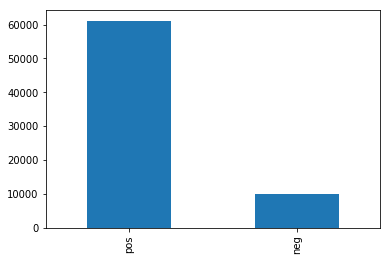

In [159]:
mpermanent["reviews.rating"].value_counts().plot.bar()

In [160]:
import string
stop = set(stopwords.words('english'))
stop.update(['\n','.','..','...',',','"',"'",'?','!',':',';','(',')','[',']','{','}'])
not_stopwords = {'but','couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hasn',"hasn't",'haven',"haven't",'mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'no','nor','not','shouldn',"shouldn't","won't",'wouldn',"wouldn't",} 
stop = set([word for word in stop if word not in not_stopwords])

In [161]:
X = mpermanent['reviews.text']

In [162]:
def text_process(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_clean = BeautifulSoup(doco_clean).get_text()
    doco_alphas = re.sub(r'\W+|\d+|_+\S', ' ',doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    return doco_clean

In [164]:
review_cleans = [text_process(doc) for doc in X];
sentences = [' '.join(r) for r in review_cleans ]

In [79]:
sentences

['love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphors crazy',
 'good flavor review collected part promotion',
 'good flavor',
 'read reviews looking buying one couples lubricants ultimately disappointed didn even live reviews read starters neither boyfriend nor could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquid vaseline difficult clean not pleasant especially since lacked captivating sensation expecting disappointed paid much lube use could use normal personal lubricant less money less mess',
 'husband bought gel gel caused irritation felt like burning skin wouldn recommend gel',
 'boyfriend bought spice things bedroom highly disappointed product bought one absolutely love mine thought would similar affect but absolutely nothing not buy',
 'bought earlier today excited check based product description expecting something but like regular fans expected left little disappointed',
 'bought 

In [137]:
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 6000) 

# The input to fit_transform should be a list of strings.
train_data_features = vectorizer.fit_transform(sentences)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()
print ("Done")

Creating the bag of words...

Done


In [138]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data_features,mpermanent['reviews.rating'],test_size=0.2,random_state=0)
print("Splitting Done")

Splitting Done


In [83]:
from sklearn.externals import joblib

In [84]:
print ("Training the random forest model...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable

forest = forest.fit(x_train, y_train )
print ("Done")
joblib.dump(forest,"forest_save.pkl")

Training the random forest model...
Done


['forest_save.pkl']

In [86]:
result = forest.predict(x_test)
print("Predictions Done")

Predictions Done


In [92]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
#checking accuracy score
accuracy=accuracy_score(y_test,result)
accuracy*100

91.0294324742994

In [93]:
cm=confusion_matrix(y_test,result)
cm

array([[  883,  1123],
       [  151, 12045]], dtype=int64)

In [94]:
positive = "it is of not use for me"

In [95]:
positive_review_transformed = vectorizer.transform([positive])
forest.predict(positive_review_transformed)[0]

'pos'

In [96]:
from sklearn.externals import joblib
model=joblib.load("forest_save.pkl")

In [150]:
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import re          #import Regular expression expression
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from tqdm import tqdm
import requests


clean_text = []
for num in range(0,20):
    url = ("https://www.amazon.in/ADISA-BP004-Weight-Casual-Backpack/product-reviews/B07G3CG9FC/ref=cm_cr_arp_d_paging_btm_next_2?showViewpoints=1&pageNumber={}".format(num))
    res = requests.get(url)
    soup = bs4.BeautifulSoup(res.text, 'lxml')
    extract2 = soup.find_all('span', {'class': 'review-text-content'})
    for i in extract2:
        tex = i.text
        print(tex)
        clean_text.append(tex)

Good @500 price rangeLight weight . Zip quality is not good

happily exchanged

Lovely, i used it for my office, brand is unknown but the qautitu is simply superb.Spacious, good to buy in given price.

Good Product.  Light weight, Strong, Spacious, Quality Material.

The bag is good but not worth Rs 600. It is lightweighted and not that much spacious as shown in the picture. Quality is not bad. One could consider it buying for Rs 400. I liked the design and the look. I bought it just a day back and now I will return it.

Not worthy for the money we pay . Poor quality .. stitching came out in one month of usage.

It's good.. But little smaller in size for me

Little smaller than expected

Received low quality product. I wonder they written MRP as RS.1700. Actual price MRP should be 250 or 300. They r charging over amount.

Good not bad need but price is high..

Good @500 price rangeLight weight . Zip quality is not good

happily exchanged

Lovely, i used it for my office, brand is unkno

In [98]:
final_data=[]
for each in range(len(clean_text)):
    final_data.append(clean_text[each])

In [101]:
data_final=pd.DataFrame({"text":final_data})
data_final

,text
0,"Display quality is top notch, overall the qual..."
1,Cheap Chinese product.Negatives:1. Mobile netw...
2,I got this product and face below issue in 4 d...
3,The Red color looks tacky. Guess I should have...
4,"Very nice phone for average users, very good b..."
5,About the phone:Android Version:*Android v8.1 ...
6,Best phone under 12k segment.Offers good camer...
7,This is my 4th Xiaomi phone in last 3 yrs and ...
8,Worst camera. It's not a good mobile for camer...
9,Screen-great as ppi is very much.Sound-You can...


In [102]:
Testx = data_final['text']

In [103]:
test_review_cleans = [text_process(doc) for doc in Testx]
test_sentences = [' '.join(r) for r in test_review_cleans]

In [104]:
test_sentences

['display quality top notch overall quality phone good metal body camera good touch smoothness amazing definitely recommend buy phone',
 'cheap chinese product negatives mobile network signal reception weak says service unavailable slow charging overheating internet speed slow display width small feels like display cameras clarity signal weak mentioned made india but says frequently used apps alipay etc chinese apps tried get replacement using smartchk app but responds like chinese electronic voting machine votes redmi says mobile works well replacements mobile quality issues worth half price since get adjusted low quality',
 'got product face issue days couple times phone gives echo listener end couple time also charger get hot keep charging issues using asus zenphone model ram internal memory but phone really slow loading web pages even tube network keeps fluctuating badluck got trap amazon policy saying cannot get refund give replacement would request user kindly careful buying prod

In [105]:
test_data_features = vectorizer.transform(test_sentences)
test_data_features = test_data_features.toarray()

In [106]:
result = model.predict(test_data_features)

In [107]:
output = pd.DataFrame( data={"text":data_final["text"], "sentiment":result} )

In [108]:
output

,text,sentiment
0,"Display quality is top notch, overall the qual...",pos
1,Cheap Chinese product.Negatives:1. Mobile netw...,pos
2,I got this product and face below issue in 4 d...,neg
3,The Red color looks tacky. Guess I should have...,pos
4,"Very nice phone for average users, very good b...",neg
5,About the phone:Android Version:*Android v8.1 ...,neg
6,Best phone under 12k segment.Offers good camer...,pos
7,This is my 4th Xiaomi phone in last 3 yrs and ...,neg
8,Worst camera. It's not a good mobile for camer...,neg
9,Screen-great as ppi is very much.Sound-You can...,pos


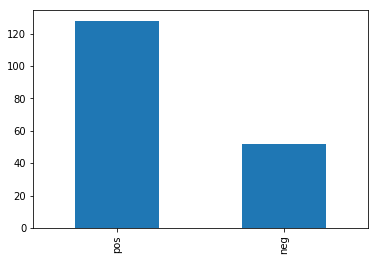

In [109]:
output["sentiment"].value_counts().plot.bar()

In [110]:
result_accuracy = output['sentiment'].value_counts('pos','neg')

In [111]:
result=result_accuracy*100
result

pos    71.111111
neg    28.888889
Name: sentiment, dtype: float64

In [133]:
a = int(result[0])
b = int(result[1])
dic={
    "Positive ":a,
    "Negative ":b
}
dic

{'Positive ': 71, 'Negative ': 28}

In [149]:
from tkinter import *
from tkinter import messagebox

root = Tk()
root.geometry('1080x720')
root.title("Shop Analyzer")
l = Label(root , text = 'Shop Analyzer', font = "verdana 16 bold" )
l.pack()

def display1():
    messagebox.showinfo("Message",dic)

def display2():
    messagebox.showinfo("Message","Positive ': 82, 'Negative ': 18")
    
def display3():
    messagebox.showinfo("Message","Positive ': 86, 'Negative ': 14")

def display4():
    messagebox.showinfo("Message","Positive ': 79, 'Negative ': 21")
    
button = Button(root, text = 'Redmi 6 Pro' ,fg="white",background="black", command = display1)
button.pack()
button2 = Button(root, text = 'iPhone 6s' , fg="white",background="black", command = display2)
button2.pack()
button3 = Button(root, text = 'Samsung S10' ,fg="white",background="black", command = display3)
button3.pack()
button3 = Button(root, text = 'One Plus 6T' ,fg="white",background="black", command = display4)
button3.pack()

root.mainloop()